# Application of SPACE on MERFISH mouse aging brain dataset

The following tutorial demonstrates how to use SPACE for tissue module discovery in a MERFISH mouse aging brain dataset.(DOI: 10.1016/j.cell.2022.12.010)

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import squidpy as sq
import space as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr

from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib import colors

In [2]:
from sklearn.metrics.cluster import adjusted_rand_score as ARI

In [3]:
plt.rcParams['axes.unicode_minus']=False
# plt.rc('font', family='Helvetica')
plt.rcParams['pdf.fonttype'] = 42
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=120,facecolor='w',frameon=True,figsize=(4,4)) 
%config InlineBackend.figure_format='retina'
%matplotlib inline

scanpy==1.9.5 anndata==0.9.2 umap==0.5.4 numpy==1.23.4 scipy==1.11.2 pandas==2.1.1 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.10


In [5]:
sp.__version__

'0.6.8'

# young

In [6]:
adata=sc.read('adata_young.h5ad')
adata

AnnData object with n_obs × n_vars = 11305 × 374
    obs: 'fov', 'center_x', 'center_y', 'min_x', 'max_x', 'min_y', 'max_y', 'age', 'clust_annot', 'slice', 'organism_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'is_primary_data', 'cell_type_annot', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_counts'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_id', 'n_cells'
    uns: 'batch_condition', 'cell_type_annot_colors', 'cell_type_colors', 'development_stage_colors', 'log1p', 'schema_version', 'tissue_colors', 'title'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'norm_expr', 'spatial'

In [7]:
adata.obsm['spatial']=adata.obsm['X_spatial'].copy()

/root/.conda/envs/SPACE/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/root/.conda/envs/SPACE/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


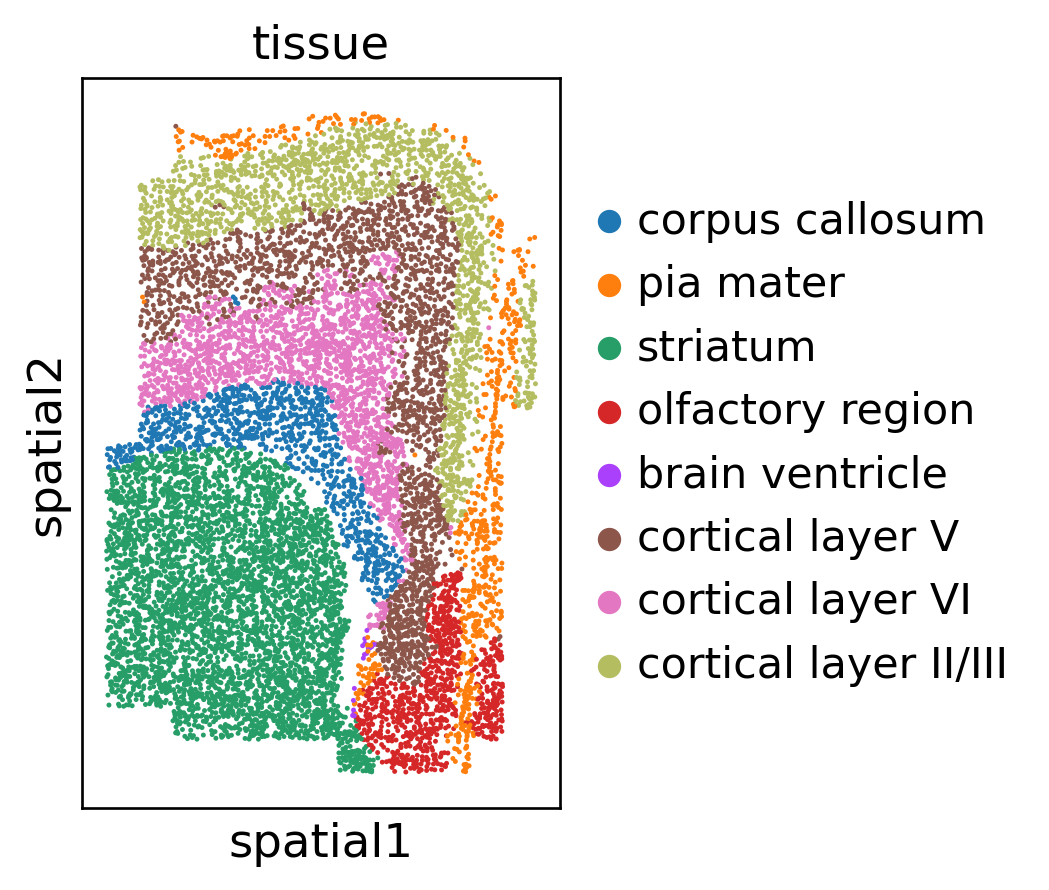

In [8]:
sc.pl.spatial(adata,color=['tissue'],spot_size=30,basis='spatial')

Construct Graph
Average links: 11.24
Load SPACE model
SPACE_Graph(
  (encoder): GAT_Encoder(
    (hidden_layer1): GATv2Conv(374, 128, heads=6)
    (hidden_layer2): GATv2Conv(768, 128, heads=6)
    (conv_z): GATv2Conv(768, 10, heads=6)
  )
  (decoder): InnerProductDecoder()
  (decoder_x): Sequential(
    (0): Linear(in_features=10, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=128, out_features=374, bias=True)
    (5): ReLU()
  )
)
Train SPACE model


  0%|          | 0/5001 [00:00<?, ?it/s]

====> Epoch: 0, Loss: 2.9820
====> Epoch: 50, Loss: 1.8906
====> Epoch: 100, Loss: 1.8413
====> Epoch: 150, Loss: 1.8141
====> Epoch: 200, Loss: 1.7969
====> Epoch: 250, Loss: 1.7912
====> Epoch: 300, Loss: 1.7781
====> Epoch: 350, Loss: 1.7687
====> Epoch: 400, Loss: 1.7582
====> Epoch: 450, Loss: 1.7426
====> Epoch: 500, Loss: 1.7285
====> Epoch: 550, Loss: 1.7209
====> Epoch: 600, Loss: 1.7103
====> Epoch: 650, Loss: 1.7002
====> Epoch: 700, Loss: 1.6857
====> Epoch: 750, Loss: 1.6754
====> Epoch: 800, Loss: 1.6667
====> Epoch: 850, Loss: 1.6554
====> Epoch: 900, Loss: 1.6485
====> Epoch: 950, Loss: 1.6438
====> Epoch: 1000, Loss: 1.6392
====> Epoch: 1050, Loss: 1.6336
====> Epoch: 1100, Loss: 1.6310
====> Epoch: 1150, Loss: 1.6259
====> Epoch: 1200, Loss: 1.6219
====> Epoch: 1250, Loss: 1.6182
====> Epoch: 1300, Loss: 1.6184
====> Epoch: 1350, Loss: 1.6142
====> Epoch: 1352, Loss: 1.6125
EarlyStopping: run 1352 iteration
computing neighbors
    finished: added to `.uns['SPACE']`
  

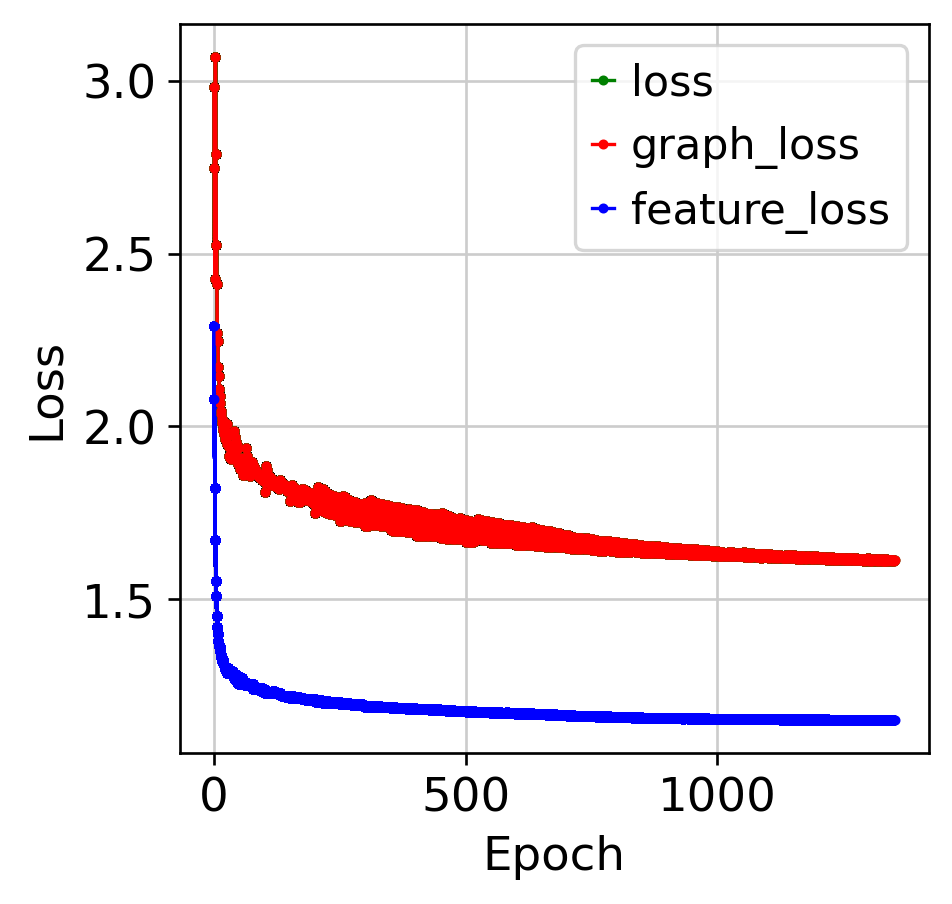

In [9]:
adata=sp.SPACE(adata,outdir='young',GPU=0,lr=0.002,k=10,verbose=True)

In [53]:
sc.tl.leiden(adata,resolution=0.128,neighbors_key='SPACE')

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


/root/.conda/envs/SPACE/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/root/.conda/envs/SPACE/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/root/.conda/envs/SPACE/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/.conda/envs/SPACE/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dt

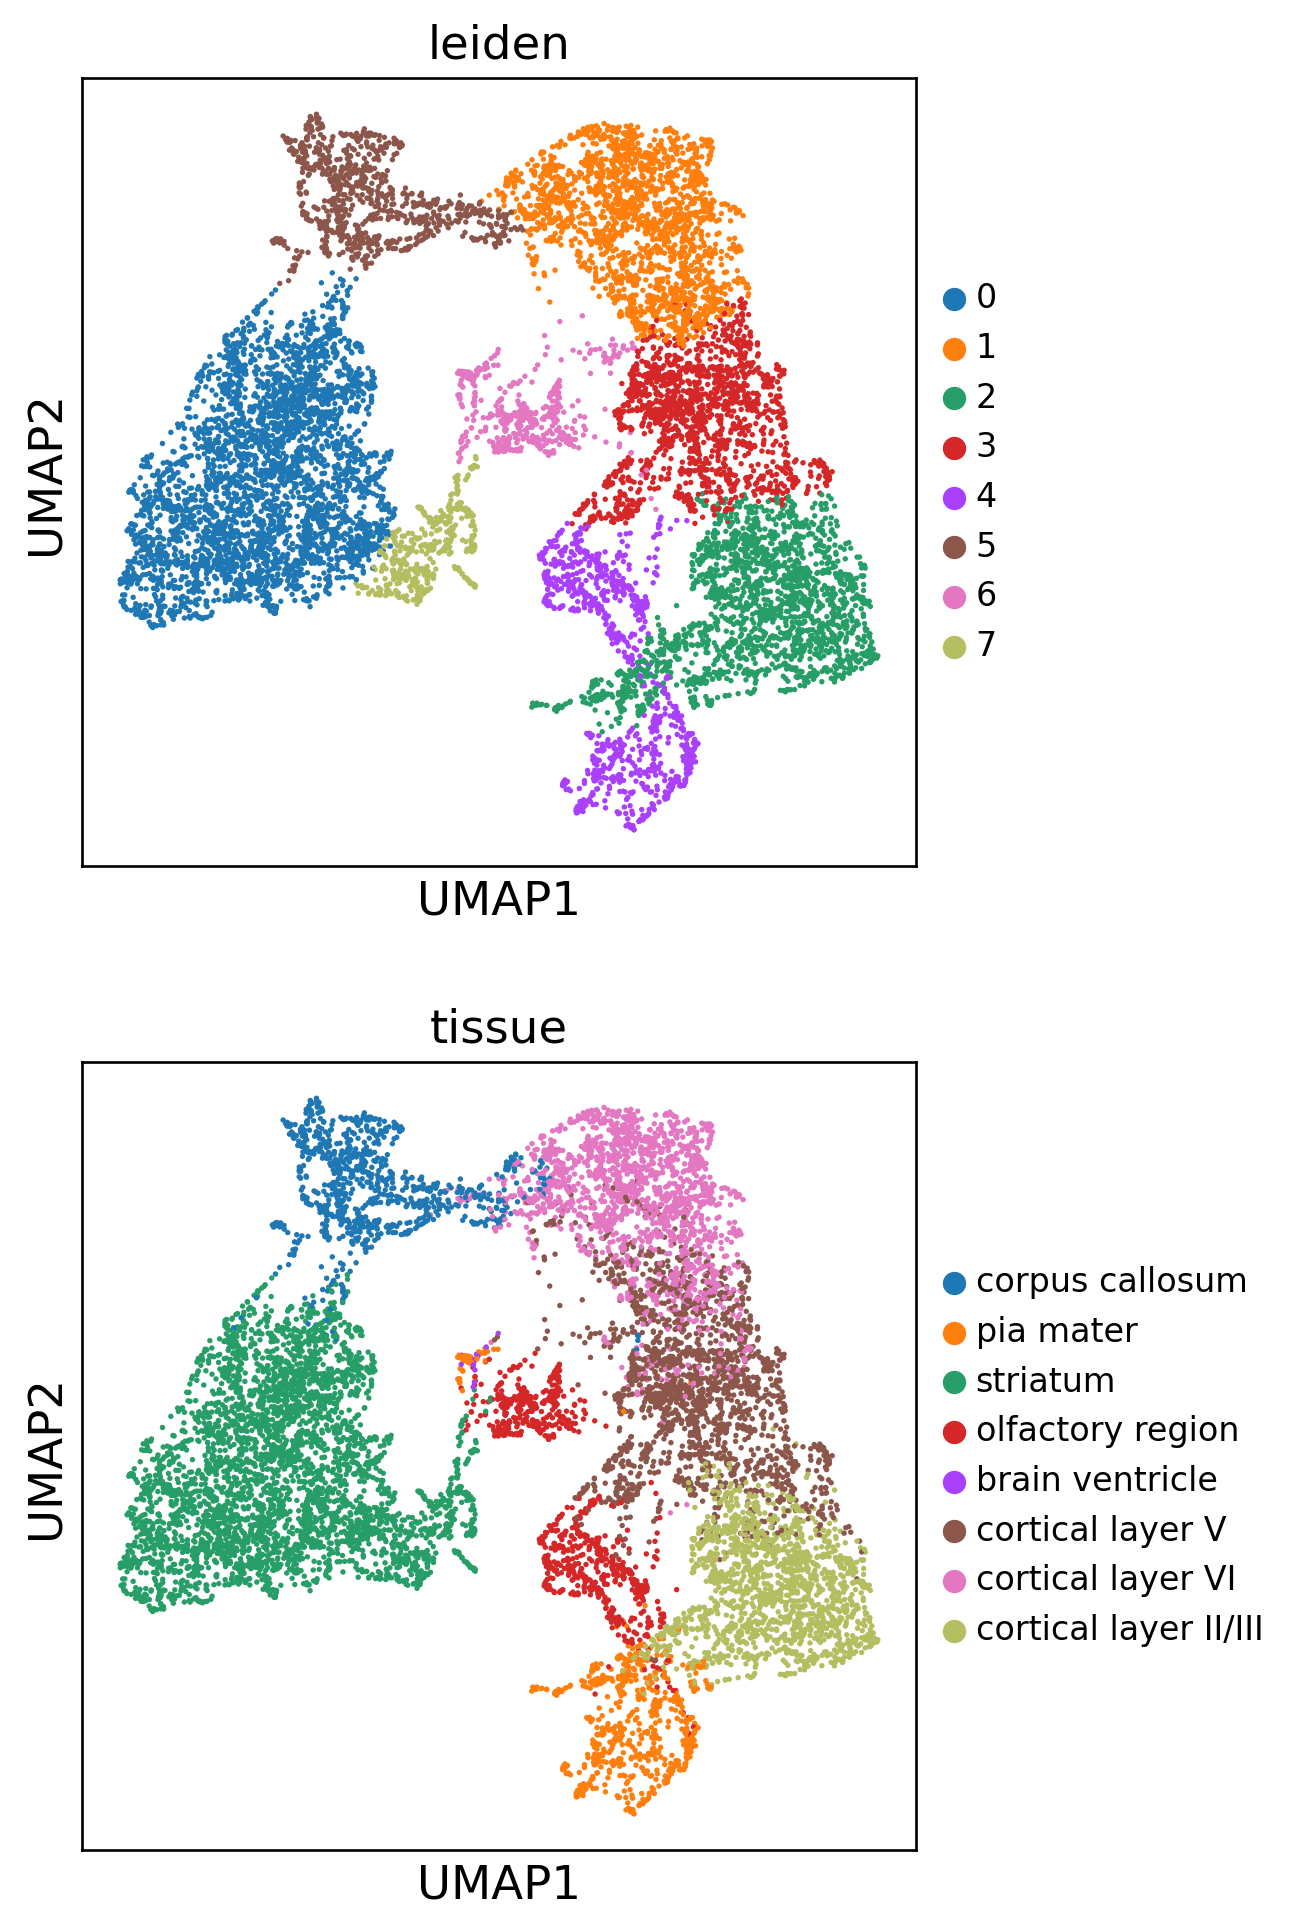

In [54]:
sc.set_figure_params(dpi=120,facecolor='w',frameon=True,figsize=(4,4.5)) 
sc.pl.umap(adata,color=['leiden','tissue'],ncols=1,legend_fontsize=10)

/root/.conda/envs/SPACE/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/root/.conda/envs/SPACE/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/root/.conda/envs/SPACE/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/root/.conda/envs/SPACE/lib/python3.10/site-packages/scanp

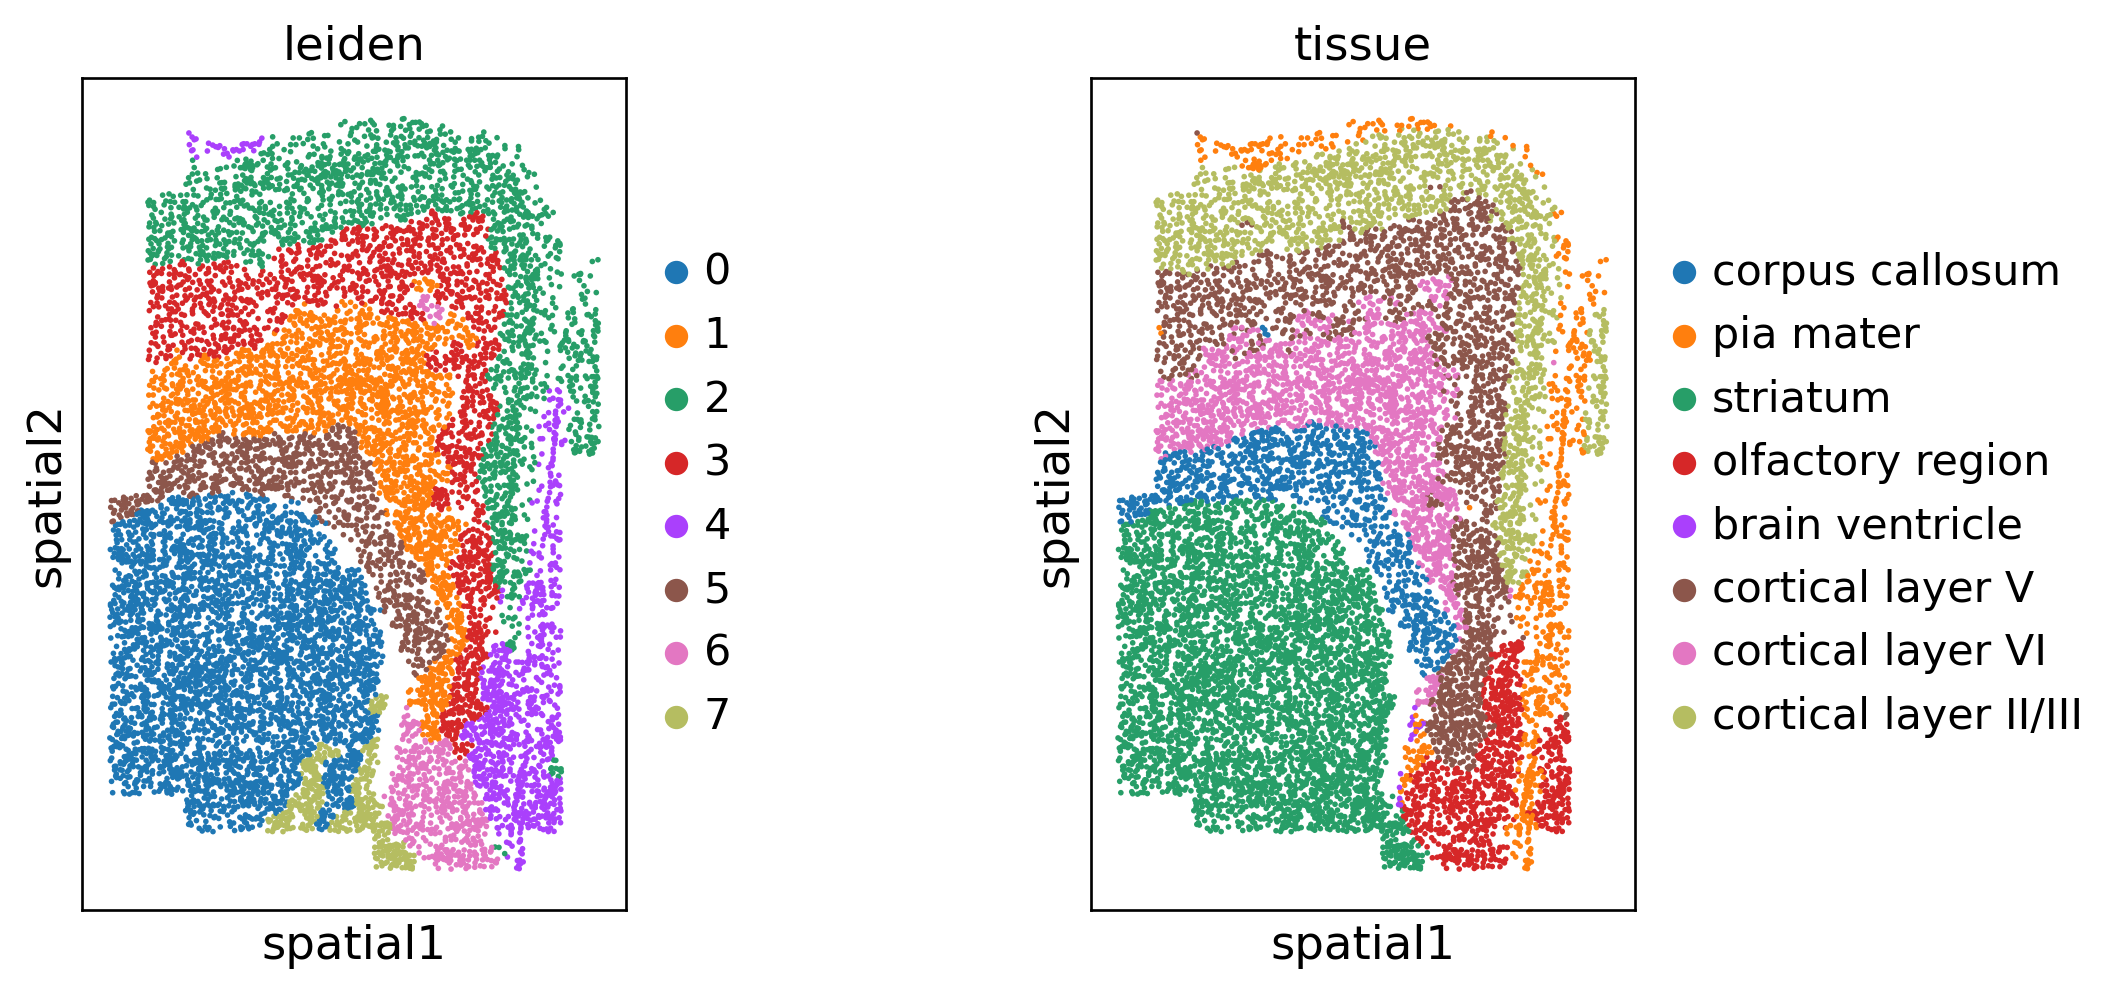

In [55]:
sc.pl.spatial(adata,color=['leiden','tissue'],spot_size=30)

In [56]:
from sklearn.metrics.cluster import adjusted_rand_score as ARI

In [57]:
ARI(adata.obs['tissue'].values, adata.obs['leiden'].values)

0.7603787846439463

In [58]:
from sklearn.metrics import homogeneity_score

In [59]:
homogeneity_score(adata.obs['tissue'].values, adata.obs['leiden'].values)

0.7394525217507102